<a href="https://colab.research.google.com/github/shuvadwip/Cat-and-Dog-Classifier/blob/main/Cat%20and%20Dog%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:16<00:00, 131MB/s]
100% 1.06G/1.06G [00:16<00:00, 68.8MB/s]


In [3]:

import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, MaxPooling2D,Dropout


In [5]:

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:

def process (image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)



In [7]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics = ['accuracy'])


In [10]:

history = model.fit(train_ds,epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 81s 117ms/step - loss: 0.5982 - accuracy: 0.6745 - val_loss: 0.4760 - val_accuracy: 0.7724
Epoch 2/10
625/625 [==============================] - 60s 96ms/step - loss: 0.4706 - accuracy: 0.7739 - val_loss: 0.4579 - val_accuracy: 0.7794
Epoch 3/10
625/625 [==============================] - 58s 92ms/step - loss: 0.3743 - accuracy: 0.8312 - val_loss: 0.4685 - val_accuracy: 0.7976
Epoch 4/10
625/625 [==============================] - 57s 90ms/step - loss: 0.2531 - accuracy: 0.8911 - val_loss: 0.6350 - val_accuracy: 0.7674
Epoch 5/10
625/625 [==============================] - 55s 87ms/step - loss: 0.1445 - accuracy: 0.9443 - val_loss: 0.8785 - val_accuracy: 0.7736
Epoch 6/10
625/625 [==============================] - 55s 87ms/step - loss: 0.0853 - accuracy: 0.9690 - val_loss: 1.1265 - val_accuracy: 0.7842
Epoch 7/10
625/625 [==============================] - 51s 81ms/step - loss: 0.0648 - accuracy: 0.9791 - val_loss: 1.1250 - val_accuracy

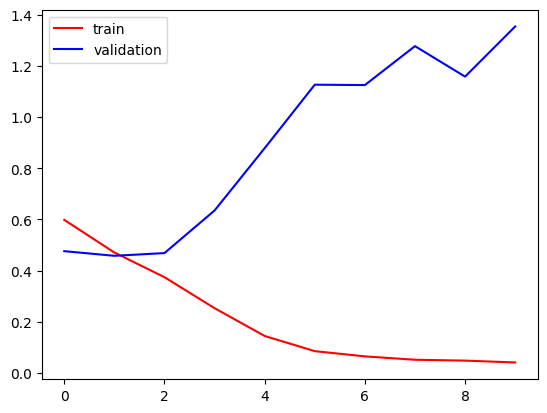

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red',label='train')
plt.plot(history.history['val_loss'], color='blue',label='validation')
plt.legend()
plt.show()


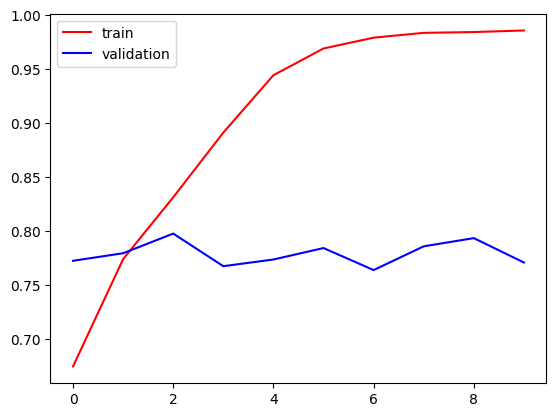

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red',label='train')
plt.plot(history.history['val_accuracy'], color='blue',label='validation')
plt.legend()
plt.show()



In [13]:

import cv2

In [14]:
test_image = cv2.imread('/content/dog.jpg')


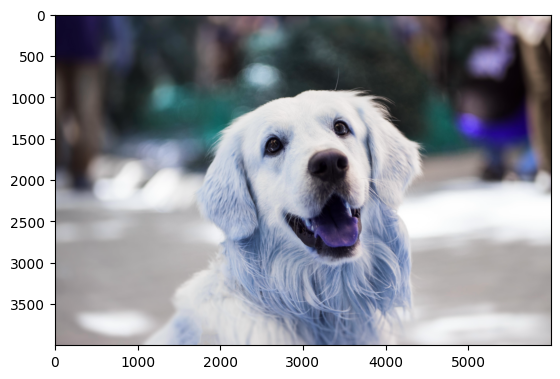

In [15]:

plt.imshow(test_image)

In [16]:
test_image.shape
test_image = cv2.resize(test_image,(256,256))
test_input = test_image.reshape(1,256,256,3)
pred = model.predict(test_input)


1/1 [==============================] - 0s 348ms/step


In [17]:
if pred == 0 :
  print("it's a Cat")
else:
  print("it's a Dog")

it's a Dog
